# The Gender Gap in College Degrees

The Department of Education Statistics releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category.

Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available on his personal website. He compiled this data set to explore the gender gap in STEM fields, which stands for science, technology, engineering, and mathematics. This gap is reported on often in the news and not everyone agrees that there is a gap.

In this project , we will explore how we can communicate the nuanced narrative of gender gap using effective data visualization.

The goal of this mission is to work with the seaborn library to quickly style plots and create small multiples using conditions we specify.

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


In [2]:
women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
print ("The dataset contains the following columns: ")
print(women_degrees.columns.tolist())

The dataset contains the following columns: 
['Year', 'Agriculture', 'Architecture', 'Art and Performance', 'Biology', 'Business', 'Communications and Journalism', 'Computer Science', 'Education', 'Engineering', 'English', 'Foreign Languages', 'Health Professions', 'Math and Statistics', 'Physical Sciences', 'Psychology', 'Public Administration', 'Social Sciences and History']


### Percentage of Biology degrees awarded by gender

##### Percentage of Biology degrees awarded to women

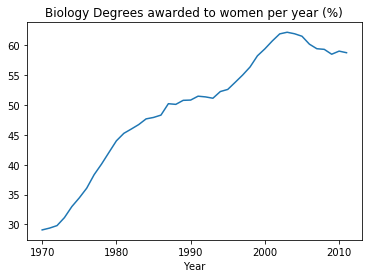

In [3]:

plt.plot(women_degrees['Year'],women_degrees['Biology'])
plt.title("Biology Degrees awarded to women per year (%)")
plt.xlabel("Year")


We see that the percentage of Biology degrees awarded to women increased steadily from 1970 and peaked in the early 2000's. This percentage has crossed the 50% threshold in 1987 and stayed above it.

In order to inspect the gender gap, we need to inspect these values between the two genders.


##### Percentage of Biology degrees awarded to men vs women

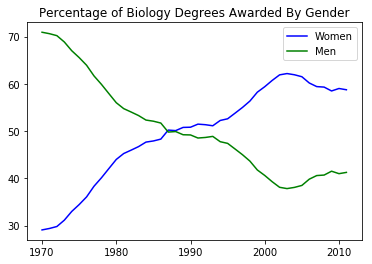

In [4]:
women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

plt.plot(women_degrees['Year'],women_degrees['Biology'],color='blue',label="Women")
women_degrees['1-Biology']=women_degrees['Biology'].apply(lambda x: 100-x)
plt.plot(women_degrees['Year'],women_degrees['1-Biology'],color='green',label='Men')
plt.title("Percentage of Biology Degrees Awarded By Gender")
plt.legend(loc='upper right')
plt.show()


### Comparison of 4 STEM Degree categories 


Let's generate line charts for four STEM degree categories ('Biology', 'Computer Science', 'Engineering' and 'Math and Statistics') on a grid to compare them.

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


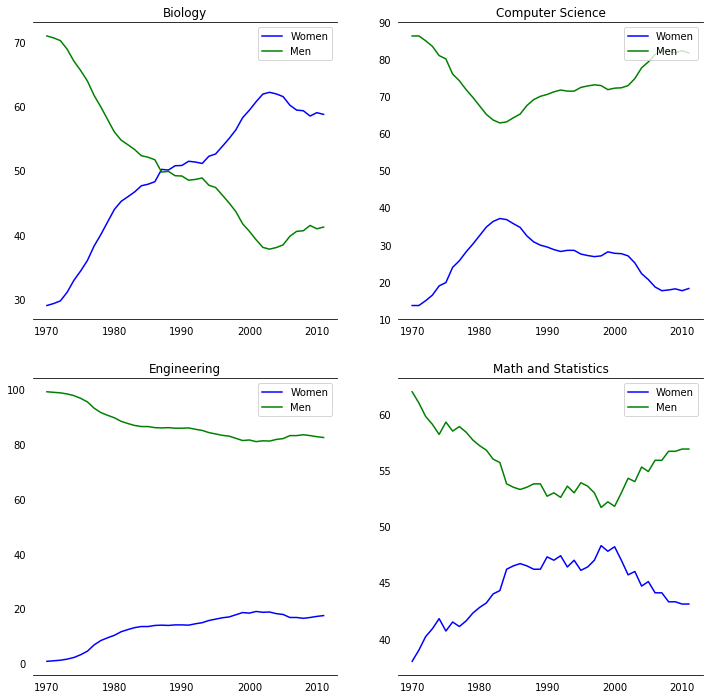

In [5]:
major_cats = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics']
fig = plt.figure(figsize=(12, 12))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c='blue', label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c='green', label='Men')

    ax.tick_params(bottom="off", top="off", left="off", right="off")
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.set_title(major_cats[sp])
    ax.legend(loc='upper right')
fig.show()
plt.legend(loc='upper right')
plt.show()



We notice a big gender gap in Computer Science and Engineering categories where percentages of degrees awarded to Men are 20 to 80 percentage points larger than those to Women.

However, the gender gap in Math and Statistics is smaller and has reached an all time low at the beginning of 2000 but continued increasing afterwards.

The gender gap in Biology degrees awarded shows a domination of Men up until 1985 when the trend reversed and there was a domintation of Women for this category.


##### Using the Color Blind 10 palette

So far, we've been using the default matplotlib colors to color the lines in line charts. When selecting colors, we need to be mindful of people who have some amount of color blindness. People who have color blindness have a decreased ability to distinguish between certain kinds of colors. The Color Blind 10 palette contains ten colors that are colorblind friendly.

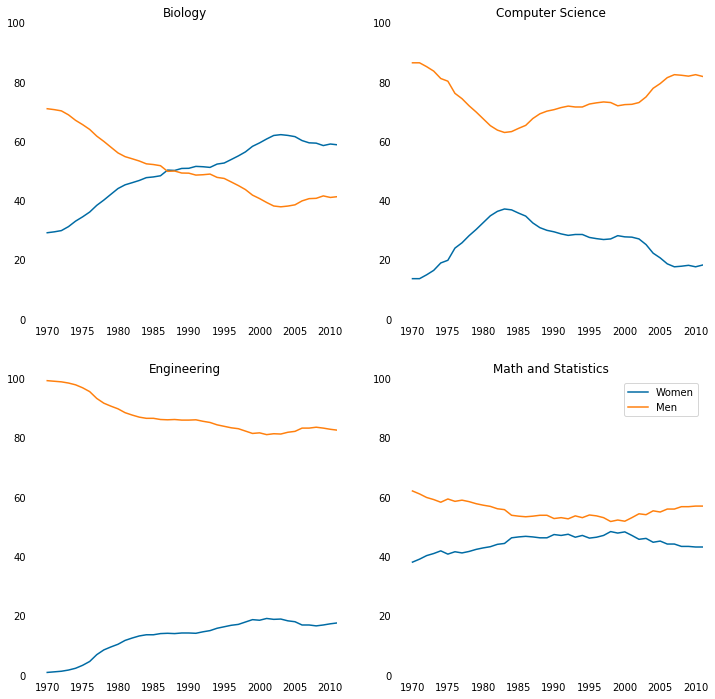

In [6]:
fig = plt.figure(figsize=(12, 12))
dark_blue=(0/255,107/255,164/255)
orange_color=(255/255, 128/255, 14/255)

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    # The color for each line is assigned here.
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c=dark_blue, label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c=orange_color, label='Men')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(major_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")

plt.legend(loc='upper right')
plt.show()

### Comparison of 6 STEM Degree categories 


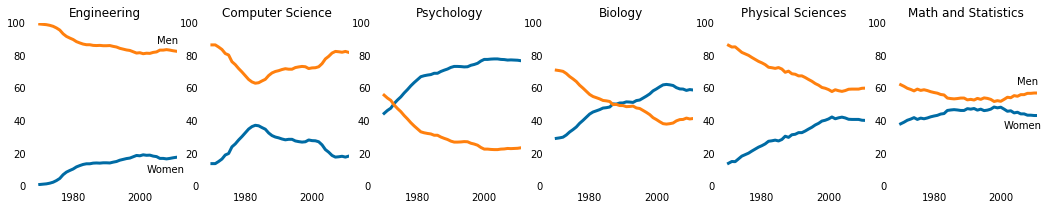

In [7]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
plt.show()

### Comparison of STEM, liberal arts and other categories 

In [8]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering', 'Computer Science']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']
print ("STEM categories:")
print(stem_cats)
print('\n')
print("Liberal Arts categories: ")
print(lib_arts_cats)
print('\n')
print("Other categories: ")
print(other_cats)

STEM categories:
['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering', 'Computer Science']


Liberal Arts categories: 
['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']


Other categories: 
['Health Professions', 'Public Administration', 'Education', 'Agriculture', 'Business', 'Architecture']


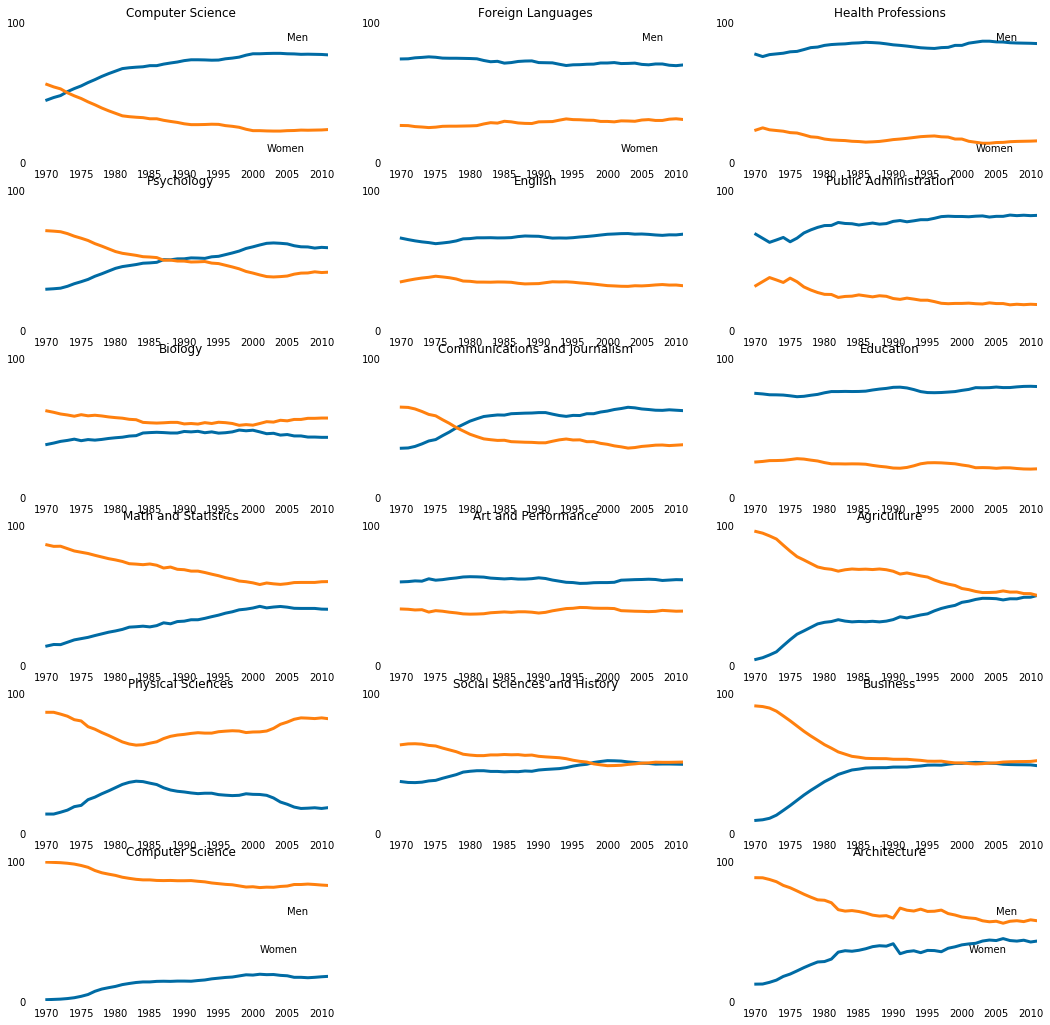

In [13]:

fig = plt.figure(figsize=(18, 18))

gs = gridspec.GridSpec(6, 3)

#1st column
category=stem_cats
len_cat=len(category)
i=0
for sp in [1,4,7,10,13,16]:
    ax=plt.subplot(gs[i, 0])
    ax.plot(women_degrees['Year'], women_degrees[category[i]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[category[i]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(category[i-1])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    ax.set_yticks([0,100])
    i+=1

    if sp == 1:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 16:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
        ax.tick_params(labelbottom='on')

#2nd column
category=lib_arts_cats
i=0
for sp in [2,5,8,11,14]:
    ax1=plt.subplot(gs[i,1])
    ax1.plot(women_degrees['Year'], women_degrees[category[i]], c=cb_dark_blue, label='Women', linewidth=3)
    ax1.plot(women_degrees['Year'], 100-women_degrees[category[i]], c=cb_orange, label='Men', linewidth=3)
    ax1.spines["right"].set_visible(False)    
    ax1.spines["left"].set_visible(False)
    ax1.spines["top"].set_visible(False)    
    ax1.spines["bottom"].set_visible(False)
    ax1.set_xlim(1968, 2011)
    ax1.set_ylim(0,100)
    ax1.set_title(category[i])
    ax1.set_yticks([0,100])
    ax1.tick_params(bottom="off", top="off", left="off", right="off")

    if sp == 2:
        ax1.text(2005, 87, 'Men')
        ax1.text(2002, 8, 'Women')
    i+=1

#3rd column
category=other_cats
i=0
for sp in [3,6,9,12,15,18]:
    ax1=plt.subplot(gs[i,2])
    ax1.plot(women_degrees['Year'], women_degrees[category[i]], c=cb_dark_blue, label='Women', linewidth=3)
    ax1.plot(women_degrees['Year'], 100-women_degrees[category[i]], c=cb_orange, label='Men', linewidth=3)
    ax1.spines["right"].set_visible(False)    
    ax1.spines["left"].set_visible(False)
    ax1.spines["top"].set_visible(False)    
    ax1.spines["bottom"].set_visible(False)
    ax1.set_xlim(1968, 2011)
    ax1.set_ylim(0,100)
    ax1.set_title(category[i])
    ax1.set_yticks([0,100])
    ax1.tick_params(bottom="off", top="off", left="off", right="off")

    if sp == 3:
        ax1.text(2005, 87, 'Men')
        ax1.text(2002, 8, 'Women')
    elif sp == 18:
        ax1.text(2005, 62, 'Men')
        ax1.text(2001, 35, 'Women')
        ax1.tick_params(labelbottom='on')
    i+=1

        
plt.show()


In [14]:
plt.savefig('gender_degrees.png')